In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Load Data

In [3]:
path = "C:\\Users\\ramya\\Downloads\\Cancer.csv"
df = pd.read_csv(path)

# Data Exploration

In [4]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [5]:
df.shape

(569, 32)

In [6]:
print(df.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
print(df.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Data Cleaning

In [8]:
df = df.drop(columns=["id"])

# Split Data for Modeling

In [9]:
features = df.drop(columns=["diagnosis"])
target = df["diagnosis"].replace({"M": True, "B": False})

In [10]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=1)

# Normalize Data

In [11]:
normalizer = MinMaxScaler()
x_train_norm = normalizer.fit_transform(x_train)
x_test_norm = normalizer.transform(x_test)

In [12]:
x_train_norm = pd.DataFrame(x_train_norm, columns=x_train.columns)
x_test_norm = pd.DataFrame(x_test_norm, columns=x_test.columns)

In [13]:
x_train_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.470707,0.229620,...,0.467805,0.356876,0.436725,0.286030,0.508684,0.380196,0.282137,0.678351,0.355038,0.319306
1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.188750,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.195155,0.341880,0.558419,0.189639,0.230967
2,0.095556,0.158607,0.086863,0.043606,0.157263,0.036133,0.008625,0.017256,0.367677,0.397495,...,0.062931,0.214552,0.052244,0.024651,0.181206,0.027487,0.012581,0.047732,0.338641,0.244459
3,0.247480,0.148123,0.241794,0.135101,0.256838,0.180510,0.160239,0.125944,0.295960,0.248297,...,0.184988,0.193763,0.185467,0.084718,0.207555,0.236995,0.262906,0.314089,0.264021,0.353678
4,0.253632,0.177207,0.238408,0.138112,0.308658,0.080762,0.049414,0.102087,0.258081,0.150297,...,0.186766,0.128731,0.167837,0.085504,0.222083,0.044091,0.042060,0.164708,0.173954,0.048506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.606228,0.521136,0.598507,0.444751,0.441184,0.427949,0.596298,0.571074,0.576768,0.239288,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.394033,0.484872,0.595189,0.413260,0.315237
451,0.178380,0.177883,0.169097,0.089841,0.228401,0.098184,0.052741,0.039140,0.171212,0.145902,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.104337,0.083376,0.117285,0.174430,0.133633
452,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.321468,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.782014,0.561197,0.652577,0.415162,0.842596
453,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.178203,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.136183,0.053256,0.273643,0.156844,0.224435


In [14]:
x_test_norm

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.523401,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.369214,0.275128,0.380756,0.299667,0.394796
1,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.385190,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.427527,0.427863,0.717526,0.554658,0.671271
2,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.317732,...,0.206688,0.210821,0.191245,0.098358,0.509344,0.197132,0.191538,0.362887,0.431084,0.435057
3,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.088113,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.238532,0.302393,0.539863,0.389734,0.151729
4,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.059328,...,0.331910,0.663380,0.297276,0.183396,0.288120,0.078376,0.132222,0.225945,0.396150,0.068958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.401297,0.073723,0.405708,0.251707,0.659655,0.417520,0.476101,0.545229,0.457576,0.449352,...,0.386339,0.133795,0.371483,0.225324,0.541042,0.363504,0.498291,0.627835,0.392110,0.490309
110,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.037135,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.921371,0.587094,0.884880,1.205323,1.261270
111,0.096928,0.257694,0.103656,0.045387,0.487226,0.373965,0.733365,0.217445,0.530808,0.664030,...,0.084667,0.283316,0.075153,0.034285,0.508684,0.449380,1.070085,0.601375,0.632605,0.666988
112,0.357281,0.325668,0.348697,0.218961,0.282116,0.179805,0.206584,0.145378,0.208586,0.158646,...,0.297759,0.436301,0.287315,0.158597,0.249158,0.260935,0.322991,0.329691,0.215067,0.207945


# Balance Data

In [15]:
sm = SMOTE(random_state=1, sampling_strategy=1.0)
X_train_sm, y_train_sm = sm.fit_resample(x_train_norm, y_train)

# Function for model evaluation

In [16]:
def evaluate_model(model, x_test, y_test, pred):
    print("Accuracy:", model.score(x_test, y_test))
    print(classification_report(y_pred=pred, y_true=y_test))
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    print("Precision:", precision)
    print("Recall:", recall)

# 1- KNN

In [17]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=12)

In [18]:
pred_knn = knn.predict(x_test_norm)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        72
        True       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Precision: 1.0
Recall: 0.8571428571428571


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


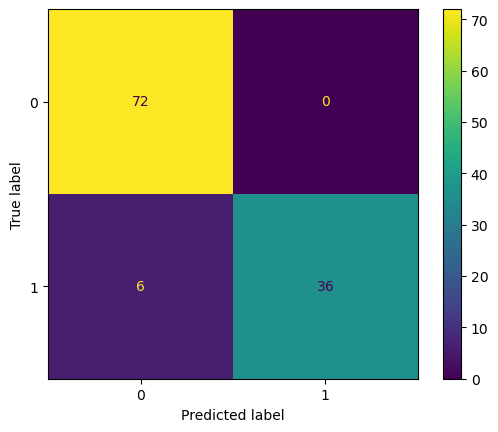

In [19]:
evaluate_model(knn, x_test_norm, y_test, pred_knn)

### KNN Hyperparameters

In [20]:
kn_grid = {'n_neighbors': list(range(1, 21))}
kn_model = GridSearchCV(KNeighborsClassifier(), param_grid=kn_grid)

In [21]:
kn_model.fit(x_train_norm, y_train)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]})

In [22]:
best_knn = KNeighborsClassifier(n_neighbors=kn_model.best_params_['n_neighbors'])
best_knn.fit(x_train_norm, y_train)

KNeighborsClassifier(n_neighbors=6)

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

       False       0.93      0.99      0.96        72
        True       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Precision: 0.9736842105263158
Recall: 0.8809523809523809


C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

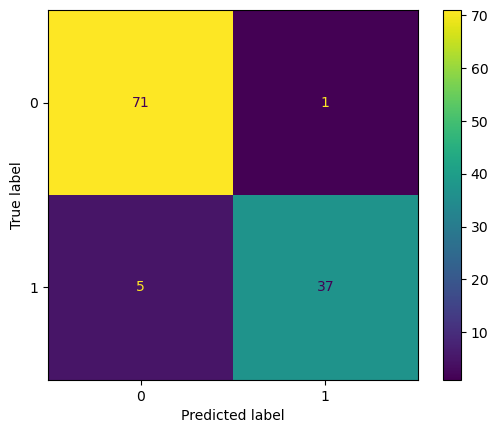

In [23]:
pred_knn_hyp = best_knn.predict(x_test_norm)
evaluate_model(best_knn, x_test_norm, y_test, pred_knn_hyp)

### KNN with Balanced Data

In [24]:
knn_bal = KNeighborsClassifier(n_neighbors=best_knn.n_neighbors)
knn_bal.fit(X_train_sm, y_train_sm)

KNeighborsClassifier(n_neighbors=6)

C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ramya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

       False       0.93      0.99      0.96        72
        True       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Precision: 0.9736842105263158
Recall: 0.8809523809523809


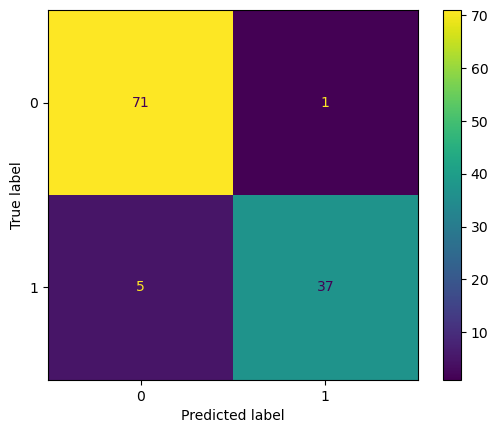

In [25]:
pred_knn_bal = knn_bal.predict(x_test_norm)
evaluate_model(knn_bal, x_test_norm, y_test, pred_knn_bal)

# 2- Decision Tree Classifier

In [26]:
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=30)

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

       False       0.95      0.97      0.96        72
        True       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Precision: 0.95
Recall: 0.9047619047619048


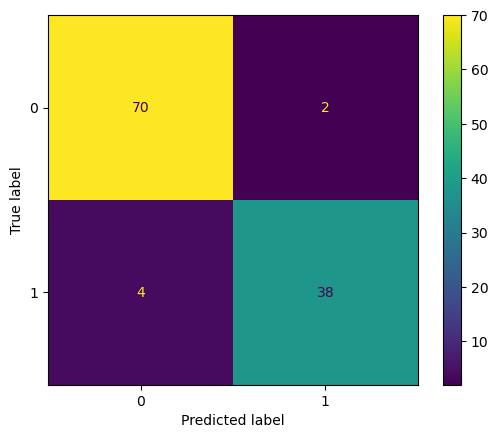

In [27]:
pred_tree = tree.predict(x_test_norm)
evaluate_model(tree, x_test_norm, y_test, pred_tree)

# 3- Gradient Boosting

In [28]:
gb_cla = GradientBoostingClassifier(max_depth=30, n_estimators=100)
gb_cla.fit(x_train_norm, y_train)

GradientBoostingClassifier(max_depth=30)

Accuracy: 0.9385964912280702
              precision    recall  f1-score   support

       False       0.93      0.97      0.95        72
        True       0.95      0.88      0.91        42

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

Precision: 0.9487179487179487
Recall: 0.8809523809523809


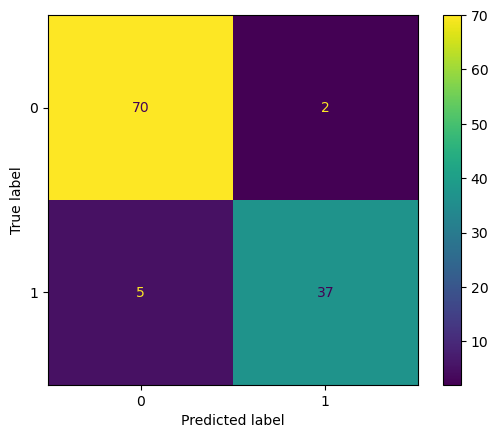

In [29]:
pred_gra = gb_cla.predict(x_test_norm)
evaluate_model(gb_cla, x_test_norm, y_test, pred_gra)

# 4- Bagging Classifier

In [30]:
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=20)
bagging_cla.fit(x_train_norm, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20),
                  n_estimators=20)

Accuracy: 0.956140350877193
              precision    recall  f1-score   support

       False       0.94      1.00      0.97        72
        True       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

Precision: 1.0
Recall: 0.8809523809523809


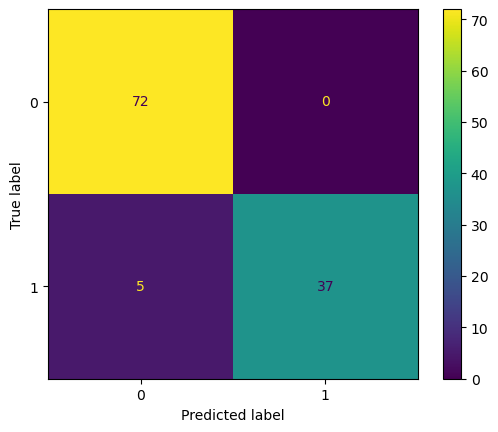

In [31]:
pred_ba = bagging_cla.predict(x_test_norm)
evaluate_model(bagging_cla, x_test_norm, y_test, pred_ba)

### Bagging Hyperparameters

In [32]:
bag_grid = {"n_estimators": [50, 80, 100]}
bag_model = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=bag_grid, cv=5)

In [33]:
bag_model.fit(x_train_norm, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [50, 80, 100]})

In [34]:
best_bag = BaggingClassifier(n_estimators=bag_model.best_params_['n_estimators'])
best_bag.fit(x_train_norm, y_train)

BaggingClassifier(n_estimators=80)

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

       False       0.95      1.00      0.97        72
        True       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Precision: 1.0
Recall: 0.9047619047619048


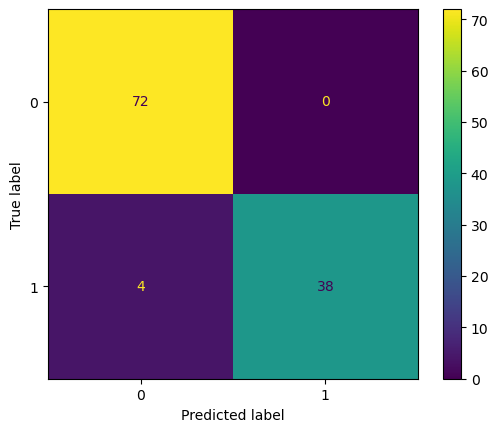

In [35]:
pred_bag_hyp = best_bag.predict(x_test_norm)
evaluate_model(best_bag, x_test_norm, y_test, pred_bag_hyp)

### Bagging with Balanced Data

In [36]:
best_bag.fit(X_train_sm, y_train_sm)

BaggingClassifier(n_estimators=80)

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

       False       0.96      1.00      0.98        72
        True       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Precision: 1.0
Recall: 0.9285714285714286


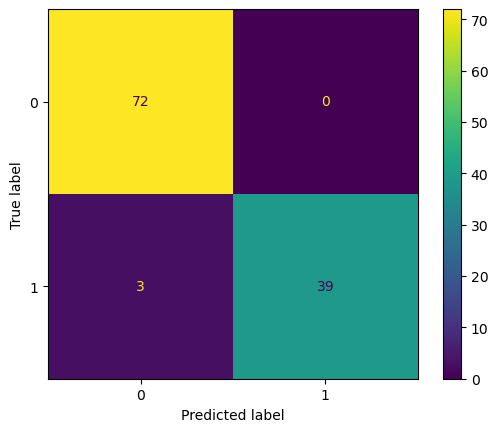

In [37]:
pred_bag_bal = best_bag.predict(x_test_norm)
evaluate_model(best_bag, x_test_norm, y_test, pred_bag_bal)

# 5- Random Forest

In [38]:
rf_grid = {"n_estimators": [50, 80, 100], "min_samples_split": [40, 60, 100]}
rf_model = GridSearchCV(RandomForestClassifier(), param_grid=rf_grid, cv=5)

In [39]:
rf_model.fit(x_train_norm, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [40, 60, 100],
                         'n_estimators': [50, 80, 100]})

In [40]:
best_rf = RandomForestClassifier(**rf_model.best_params_)
best_rf.fit(x_train_norm, y_train)

RandomForestClassifier(min_samples_split=60)

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

       False       0.93      0.99      0.96        72
        True       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Precision: 0.9736842105263158
Recall: 0.8809523809523809


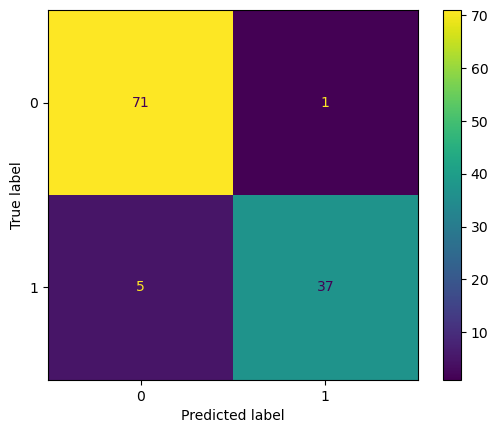

In [41]:
pred_rf = best_rf.predict(x_test_norm)
evaluate_model(best_rf, x_test_norm, y_test, pred_rf)